#  WINE QUALITY PREDICTION

### Problem Statement: - 
To develop a machine learning model which can predict the quality of wine based on the physiochemical features available. 

### Objective: - 
The objective of the project is to create a machine learning model which can predict the quality of wine accurately based on the physiochemical features, so that the manufacturers of wine can improve on the process of making wine and produce high-qualtiy wine which would lead to the increased sale of the wine.

### Dataset: - 
The Wine Quality dataset can be downloaded from the UCI Machine Learning Repository. The data has **1599 rows** and **12 attributes (11 features + 1 ouput)**. The dataset includes the physiochemical properties of the two types of wine: **Red** and **White** vinho verde wine samples, from the north of Portugal. There are **11** physiochemical features such as fixed acidity, citric acid, chlorides, pH, etc. The target variable is the quality ratings of the wine which has been given the range between **0-10**. 

### Feature Included: - 
1. **fixed acidity** - The amount of acid in the wine that is not volatile. This can affect the taste and pH of the wine, and may be an indicator of the grape variety or fermentation process.
2. **volatile acidity** - The amount of acetic acid in the wine that is volatile. High levels of volatile acidity can indicate poor wine quality, as it can cause a vinegar-like taste.
3. **Citric acid** - The amount of citric acid in the wine. This is a naturally occurring acid that can contribute to the wine's acidity and freshness.
4. **residual sugar** - The amount of sugar that remains in the wine after fermentation. This can affect the sweetness and body of the wine.
5. **chlorides** - The amount of salt in the wine. High levels of chlorides can indicate poor wine quality.
6. **free sulfur dioxide** - The amount of free sulfur dioxide in the wine. This acts as a preservative and can affect the wine's aroma and taste.
7. **total sulfur dioxide** - The total amount of sulfur dioxide in the wine. This is a measure of the wine's stability and can also affect its aroma and taste.
8. **density** - The density of the wine. This can indicate the alcohol content and the sweetness of the wine.
9. **pH** - The pH of the wine. This can affect the wine's taste and stability, and can also be an indicator of grape variety or fermentation process.
10. **sulphates** - The amount of sulphates in the wine. This can affect the wine's aroma and taste, and also acts as a preservative.
11. **alcohol** - The alcohol content of the wine. This can affect the wine's body, aroma, and taste.
12. **quality** - The quality of the wine, as rated by experts. This is the target variable in the dataset, and can be used to train a machine learning model to predict wine quality based on the other features.

### Methodology: - 
The methodology for Wine Quality prediction involves the following steps:
1. Data collection and preprocessing: The Wine Quality dataset is collected from the UCI Machine Learning Repository, and the data is preprocessed by removing any missing or duplicate values.
2. Exploratory data analysis: The dataset is analyzed using statistical and visualization techniques to identify any patterns or trends in the data.
3. Feature selection and engineering: The relevant features are selected for the model, and new features are created if required.
4. Model training and evaluation: Various machine learning algorithms such as Decision Trees, Random Forest, and Support Vector Machines are trained and evaluated using cross-validation techniques to identify the best-performing algorithm.
5. Model optimization: The best-performing algorithm is optimized by tuning its hyperparameters to improve its performance.
6. Model deployment: The final model is deployed in a production environment for real-time predictions.

## IMPORTING THE LIBRARIES REQUIRED 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

## DATA COLLECTION AND PREPROCESSING

In [2]:
# Collecting the dataset 
df = pd.read_csv("wine_dataset.csv")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.shape

(1599, 12)

In [5]:
# Drop the duplicate values 

df = df.drop_duplicates()

In [6]:
# Drop the null values

df = df.dropna()

Dropped all the null values and duplicate values to clean the dataset.

## EXPLORATORY DATA ANALYSIS

In [7]:
df["quality"].value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

In [8]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


The data contains **1359** rows with all the columns having **float** and **int** datatypes.

In [10]:
# Extracting the features in the dataset

df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [12]:
# Checking for any null value

df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

The data is now clean with no null values.

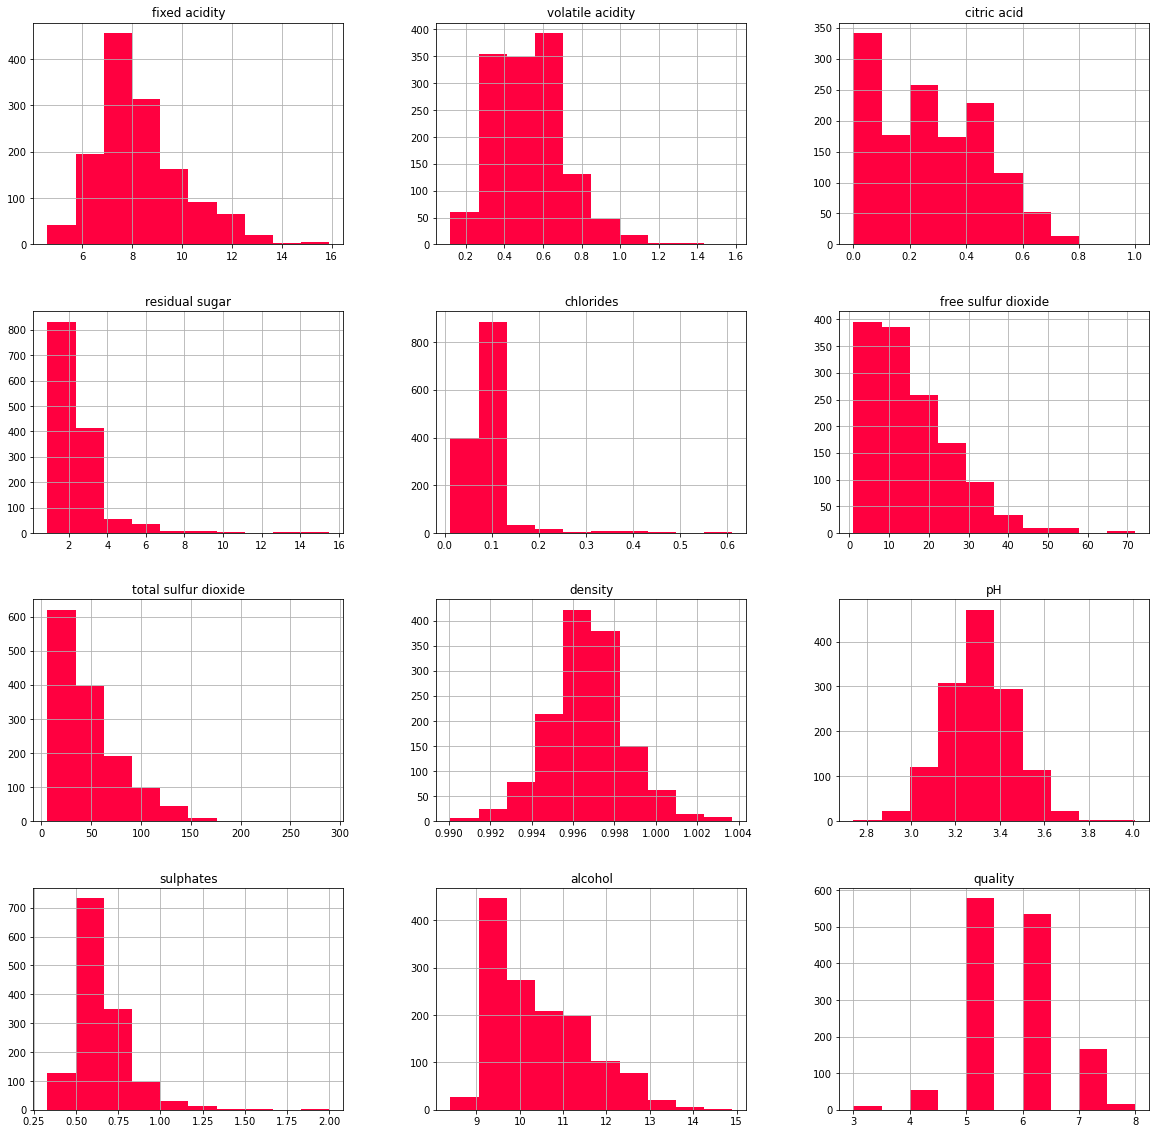

In [29]:
# Histogram plot for every feature

df.hist(figsize = (20, 20), color = "#ff0040")
plt.show()

From the histograms of individual feature it can be seen that only density and pH column is normally distributed, rest of the features are not normally distributed.
The quality column has maximum ratings of 5 and 6.

In [11]:
cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']

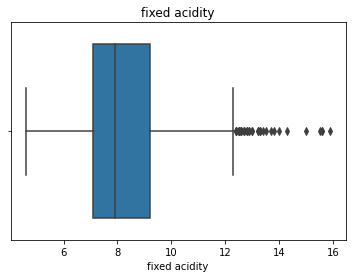

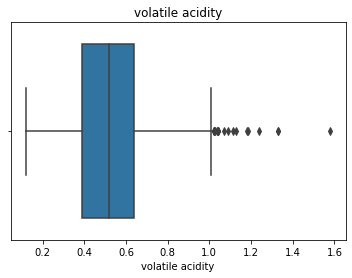

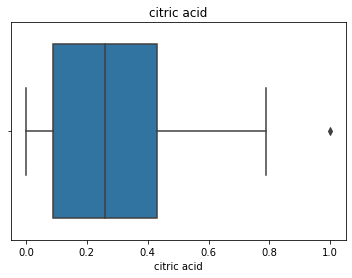

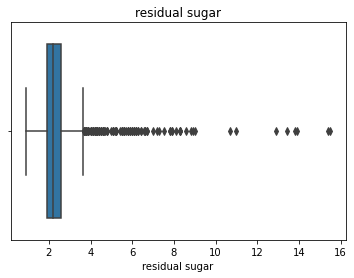

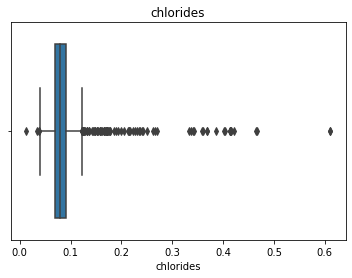

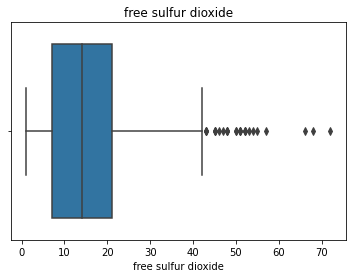

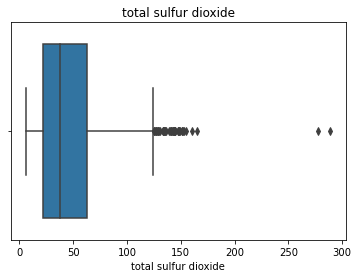

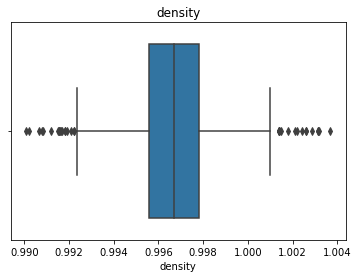

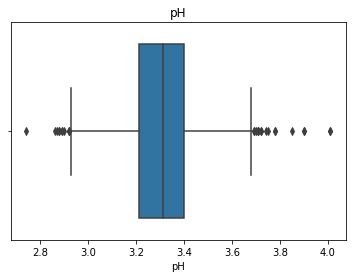

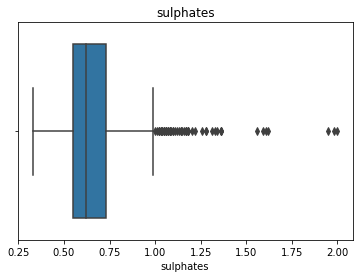

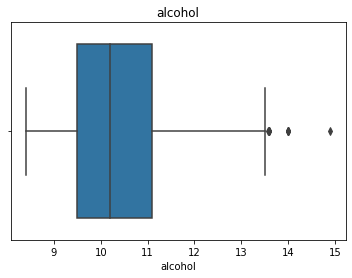

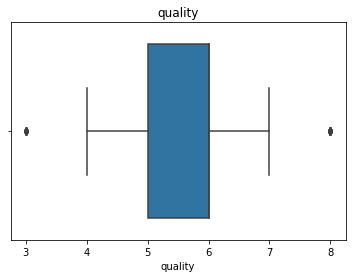

In [14]:
# Boxplot for every feature

for col in cols:
    plt.figure()
    sns.boxplot(df[col])
    plt.title(col)

Outliers are present in our data. Since, our data is very small we will not eliminate the outliers. The maximum outliers are present in the columns: residual sugar, chlorides, free sulfur dioxide, total sulpfur dioxide, sulphates.

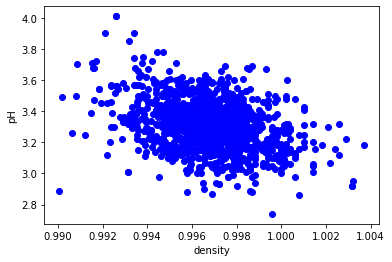

In [15]:
# Scatter plots 

d = df["density"]
ph = df["pH"]

plt.scatter(d, ph, color = "blue")
plt.xlabel("density")
plt.ylabel("pH")
plt.show()

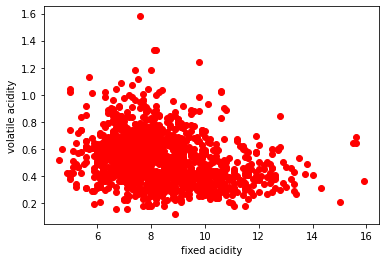

In [16]:
fa = df["fixed acidity"]
va = df["volatile acidity"]

plt.scatter(fa, va, color = "red")
plt.xlabel("fixed acidity")
plt.ylabel("volatile acidity")
plt.show()

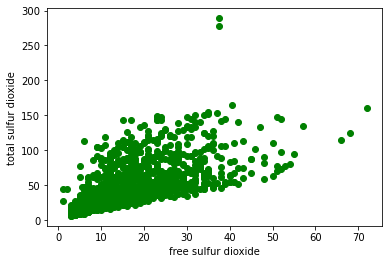

In [17]:
fsd = df["free sulfur dioxide"]
tsd = df["total sulfur dioxide"]

plt.scatter(fsd, tsd, color = "green")
plt.xlabel("free sulfur dioxide")
plt.ylabel("total sulfur dioxide")
plt.show()

<AxesSubplot:>

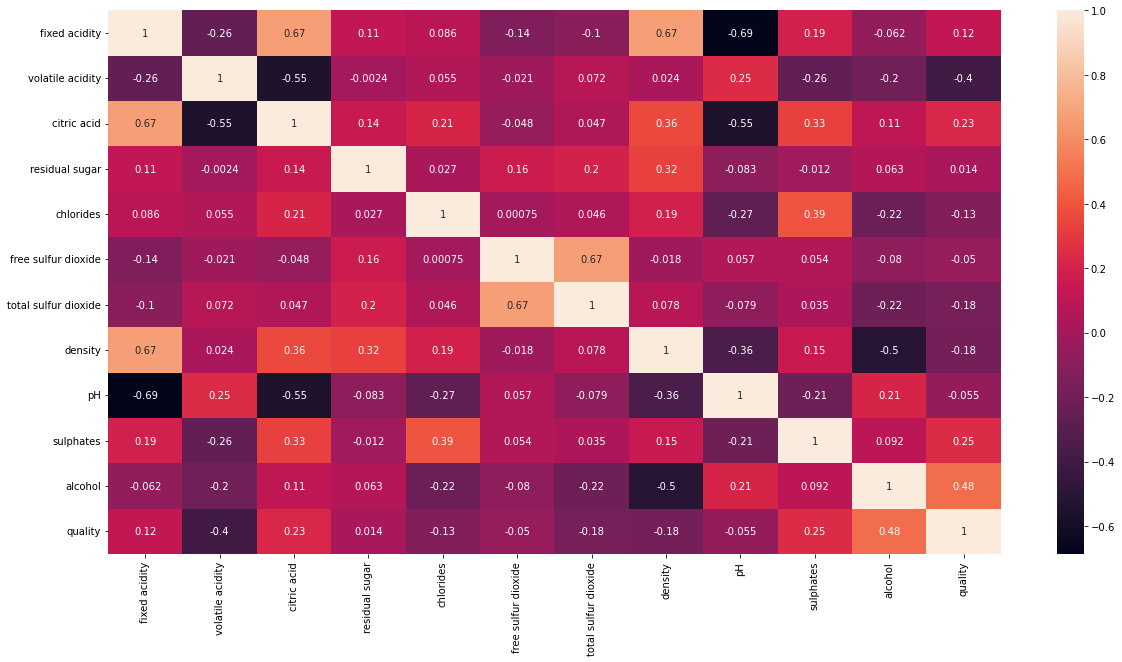

In [18]:
# Heatmap for checking correlation

plt.figure(figsize = (20, 10))
sns.heatmap(df.corr(), annot = True)

It can be observed from the heat map that the "total sulfur dioxide" and "free sulfur dioxide" are highly correlated with each other. Hence, it can be removed.

In [28]:
# To plot pairwise relationships in a dataset

# plt.figure(figsize = (20, 10))
# sns.pairplot(df, hue = "quality")
# plt.show()

## FEATURE SELECTION AND ENGINEERING 

In [20]:
X = df.drop(["quality", "total sulfur dioxide"], axis = 1)
y = df["quality"] >= 5      ##  splitting the ratings as Good or Bad for high accuracy 

Here, we will classify whether the quality of wine is good or bad. We will create y column having values True (quality >= 5 is good quality) or False (quality < 5 is bad quality). 

In [21]:
# splitting the Dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

<Figure size 5760x720 with 0 Axes>

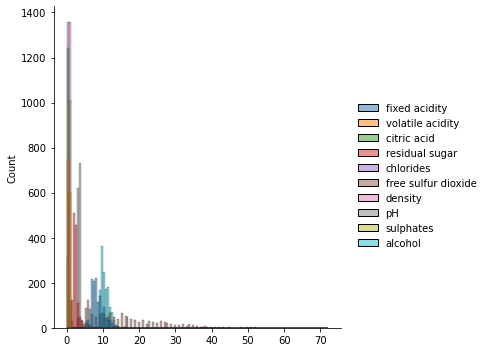

In [22]:
# Plotting a distribution plot

plt.figure(figsize = (80, 10))
sns.displot(X)

Distribution of data for every feature before scaling.

In [23]:
# Scaling the data using the Standard Scaler

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

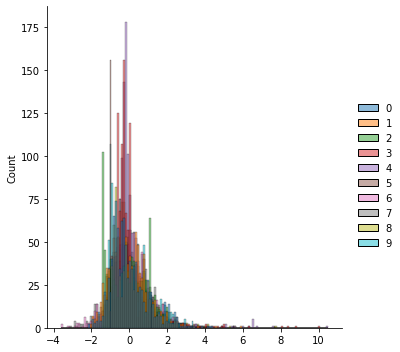

In [24]:
# Plotting the distribution plot after scaling the data

sns.displot(X_train)

Normalized distribution of data for every feature after scaling.

## MODEL TRAINING AND EVALUATION

Model training and Evaluation using Decision Tree Classifier, SVC, Random Forest Classifier

Accuracy:  0.9470588235294117


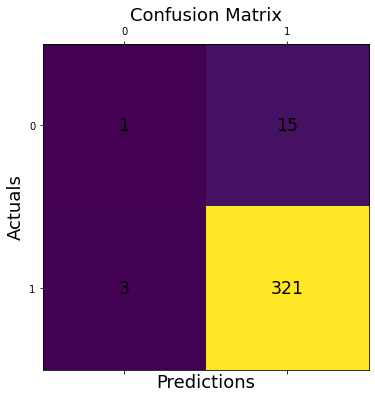

In [25]:
# Using Decision Tree Classifier 

clf_dt = DecisionTreeClassifier(criterion = "entropy", max_depth = 3)
clf_dt.fit(X_train, y_train)
y_pred_dt = clf_dt.predict(X_test)

#  Checking Accuracy of the model

print("Accuracy: ", metrics.accuracy_score(y_test, y_pred_dt))


matrix= confusion_matrix(y_test, y_pred_dt)

fig, ax = plt.subplots(figsize=(6, 6))
ax.matshow(matrix )
for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        ax.text(x=j, y=i,s=matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

Accuracy obtained for the test data is **94.7%**

Accuracy:  0.7441176470588236


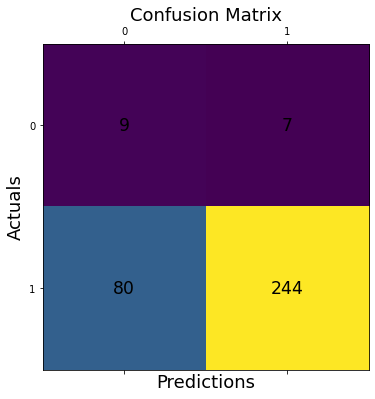

In [26]:
# Using the Support Vector Classifier

clf_sv = SVC(C = 1.0, kernel = "rbf", degree = 3, gamma = "auto", probability = False, tol = 0.001,
             cache_size = 200, verbose = False, max_iter = 1, 
             decision_function_shape = "ovr", random_state = None)
clf_sv.fit(X_train, y_train)

y_pred_sv = clf_sv.predict(X_test)

#  Checking Accuracy of the model

print("Accuracy: ", metrics.accuracy_score(y_test, y_pred_sv))

matrix= confusion_matrix(y_test, y_pred_sv)

fig, ax = plt.subplots(figsize=(6, 6))
ax.matshow(matrix )
for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        ax.text(x=j, y=i,s=matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

Accuracy obtained for the test data is **74.4%** 

Accuracy:  0.9529411764705882


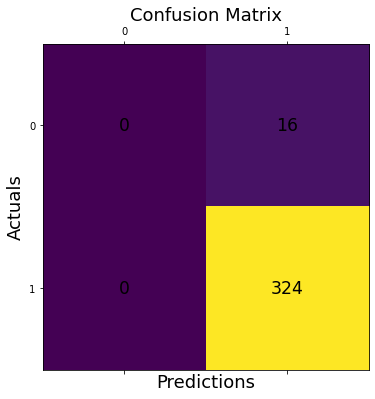

In [27]:
# Using the Random Forest Classifier

clf_rf = RandomForestClassifier(criterion = "entropy", max_depth = 6, random_state = 0)
clf_rf.fit(X_train, y_train)
y_pred_rf = clf_rf.predict(X_test)

#  Checking Accuracy of the model

print("Accuracy: ", metrics.accuracy_score(y_test, y_pred_rf))


matrix= confusion_matrix(y_test, y_pred_rf)

fig, ax = plt.subplots(figsize=(6, 6))
ax.matshow(matrix )
for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        ax.text(x=j, y=i,s=matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

Accuracy obtained for the test data is **95.3%**

# Conclusions

The project was successfully completed with very good results. 

**Firstly**, exploratory data analysis was performed on the dataset where we generated important insights about the data. 
1. There were many outliers in the dataset. 
2. The correlation between **total sulfur dioxide** and **free sulfur dioxide** was the highest. 
3. The maximum quality ratings given were **5** and **6**.
4. Pairplot was generated to get the complete insights about the data.

**Secondly**, preprocessing was done on the data.
1. Null and duplicate values were checked and dropped.
2. Highly correlated features were eliminated
3. Scaling of data was done using **Standard Scaler** to improve the accuracy of the models.

**Thirdly**, Model Training and evaluation was done using 3 models: Decision Tree Classifier, Support Vector Classifier, and Random Forest Classifier.
1. With Decision Tree Classifier, we got the accuracy of **94.7%**
2. With SVC, we got the accuracy of **74.4%**
3. With Random Forest Classifier, we got the accuracy of **95.3%**

Confusion matrices are also plotted for the models.

The best model among the three with higher accuracy was **Random Forest Classifier** with the test accuracy of **95.3%**.



#### Limitations 

1. Limited number of samples.
2. Limited number of features (only 12).
3. Limited range of wine type (only red and white)
4. Subjective nature of the quality of wine (different people have different perspective for a good wine)

#### Possible areas for future research

1. Expansion of the dataset
2. Analysis of other types of wine
3. Adding sensory data like taste and aroma.
4. Including the data related to region differences.
5. Including price of the wine in different regions.

## References: - 

1. https://archive.ics.uci.edu/ml/datasets/wine+quality
2. https://careerfoundry.com/en/blog/data-analytics/how-to-find-outliers/
3. https://plotly.github.io/plotly.py-docs/generated/plotly.express.box.html
4. https://seaborn.pydata.org/generated/seaborn.pairplot.html
5. https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC
6. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
